# 1. Document Loaders

In [1]:
!pip install langchain pypdf unstructured pdf2image docx2txt pdfminer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (1) URL Document Loader

In [3]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://n.news.naver.com/mnews/article/092/0002307222?sid=105")

data = loader.load()
print(data[0].page_content)




















"AI, 5년 뒤 사람보다 더 똑똑해진다"













본문 바로가기






NAVER

뉴스


연예




스포츠




날씨




프리미엄










검색










언론사별


정치


경제


사회


생활/문화


IT/과학


세계


랭킹


신문보기


오피니언


TV


팩트체크


알고리즘 안내


정정보도 모음



















구독

지디넷코리아 언론사 구독되었습니다. 메인 뉴스판에서  주요뉴스를  볼 수 있습니다.
보러가기


지디넷코리아 언론사 구독 해지되었습니다.




PICK
안내


언론사가 주요기사로선정한 기사입니다.
언론사별 바로가기
닫기




"AI, 5년 뒤 사람보다 더 똑똑해진다"




입력2023.10.09. 오후 12:27

기사원문
 




김미정 기자

TALK









김미정 기자

TALK
구독
구독중




구독자
0


응원수
0



더보기














추천




쏠쏠정보
0




흥미진진
0




공감백배
0




분석탁월
0




후속강추
0


 



댓글





본문 요약봇



본문 요약봇도움말
자동 추출 기술로 요약된 내용입니다. 요약 기술의 특성상 본문의 주요 내용이 제외될 수 있어, 전체 맥락을 이해하기 위해서는 기사 본문 전체보기를 권장합니다.
닫기








텍스트 음성 변환 서비스 사용하기



성별
남성
여성


말하기 속도
느림
보통
빠름

이동 통신망을 이용하여 음성을 재생하면 별도의 데이터 통화료가 부과될 수 있습니다.
본문듣기 시작

닫기


 

글자 크기 변경하기



가1단계
작게


가2단계
보통


가3단계
크게


가4단계
아주크게


가5단계
최대크게






SNS 보내기



인쇄하기








토론토 대학교 제프리 힌튼 교수 "AI가 사람 통제할 수도…전 인류 경각심 가져야""5년 뒤 인공지능(AI) 추론 능력이 사람보다 더 뛰어

In [4]:
!pip install pdfminer.six pillow_heif

In [5]:
from langchain.document_loaders import UnstructuredURLLoader

urls = [
    "https://n.news.naver.com/mnews/article/092/0002307222?sid=105",
    "https://n.news.naver.com/mnews/article/052/0001944792?sid=105",
]

loader = UnstructuredURLLoader(urls=urls)

data = loader.load()
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[Document(page_content='본문 바로가기\n\nNAVER\n\n뉴스\n\n연예\n\n스포츠\n\n날씨\n\n프리미엄\n\n검색\n\n언론사별\n\n정치\n\n경제\n\n사회\n\n생활/문화\n\nIT/과학\n\n세계\n\n랭킹\n\n신문보기\n\n오피니언\n\nTV\n\n팩트체크\n\n알고리즘 안내\n\n정정보도 모음\n\n지디넷코리아 언론사 구독되었습니다.\n\n메인 뉴스판에서  주요뉴스를\n\n볼 수 있습니다.\n\n보러가기\n\n지디넷코리아 언론사 구독 해지되었습니다.\n\n언론사가 주요기사로\n\n언론사가 주요기사로\n\n선정한 기사입니다.\n\n언론사별 바로가기\n\n닫기\n\n"AI, 5년 뒤 사람보다 더 똑똑해진다"\n\n2023.10.09. 오후 12:27\n\n기사원문\n\n김미정 기자\n\nTALK\n\n김미정 기자\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\tTALK\n\t\t\t\t\t\t\t\t\t\t구독\n\t\t\t\t\t\t\t\t\t\t구독중\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t구독자\n\t\t\t\t\t\t\t\t\t\t0\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t응원수\n\t\t\t\t\t\t\t\t\t\t0\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t더보기\n\n추천\n\n쏠쏠정보\n\t\t\t\t\t\t\t\t\t0\n\n흥미진진\n\t\t\t\t\t\t\t\t\t0\n\n공감백배\n\t\t\t\t\t\t\t\t\t0\n\n분석탁월\n\t\t\t\t\t\t\t\t\t0\n\n후속강추\n\t\t\t\t\t\t\t\t\t0\n\n댓글\n\n본문 요약봇\n\n도움말\n\n자동 추출 기술로 요약된 내용입니

### (2) PDF Document Loader

In [6]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

In [7]:
print(pages[1].page_content)

| 2 | CIS이슈리포트 2022-2 호 ▶혁신성장 ICT 산업의 정책금융 공급규모 및 공급속도를 종합적으로 분석한 결과, 차세대무선통신미디어 , 
능동형컴퓨팅 (이상 정보통신 테마), 차세대반도체 (전기전자 테마) 및 객체탐지 (센서측정 테마) 기술분야로 
혁신성장 정책금융이 집중되고 있음
[ICT 산업 내 주요 기술분야 혁신성장 정책금융 공급 현황]
                                                            (단위: 억 원, %)
테마
(대분류 )주요 기술분야
(중분류 )정책금융 공급규모 연평균 공급액 
증가율 (%)테마 내 공급 
점유율 (%) 2017 년 말 2021 년 말
정보통신차세대무선통신미디어 7,820 27,865 37.4 45.1
능동형컴퓨팅 352 16,032 159.8 10.1
전기전자 차세대반도체 12,019 53,779 45.4 58.5
센서측정 객체탐지 1,278 6,711 51.4 48.5
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                                            (단위: 억 달러, %)
주요 기술분야
(중분류 )주요 품목
(소분류 )시장규모 전망시장 촉진·저해요인2020 년 2025년(E) CAGR(%)
차세대
무선통신미디어5G이

### (3) Word Document Loader

In [8]:
!pip install docx2txt

In [9]:
from langchain.document_loaders import Docx2txtLoader

loader = Docx2txtLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/해커톤.docx")
data = loader.load()

In [10]:
data

[Document(page_content='<식단 기반 영양제 추천 서비스>\n\n\n\n아이디어 \n\n 일일 섭취량 기반 필요 영양성분 / 초과 영양성분 알림 서비스\n\n \n\n기획 배경 \n\n의학이 발달함에 따라 기대 수명 증가\n\n\n\n단순히 오래 사는 것이 아닌 건강하게 오래사는 법에 대한 관심 증가\n\n\n\n실질적으로 모든 필요 영양성분을 식단을 통해 섭취 불가\n\n\n\n가지고 있는 질병 및 건강 증진을 목적으로 사람들의 영양제 섭취량 증가\n\n\n\n필요 영양제와 복용법에 관한 관심 증가, 오남용으로 인한 부작용에 대한 걱정 / 너무 다양한 정보로 인한 혼란 야기\n\n필요 영양제와 복용법에 관한 관심 증가, 무분별한 정보로 인한 혼란 야기, 오남용 증가\n\n\n\n1인 가구 및 외식 비중의 증대로 섭취한 음식 정보에 대한 정확한 인지 불가능\n\n \n\n\n\n서비스 구성\n\n사전에 사용자 정보 등록\n\n성별, 나이, 키, 체중, 직업, 활동량, 야외활동량 (햇빛 노출) , 가지고 있는 질병, 기타 개선을 바라는 증상 등\n\n\n\n하루 섭취 정보 기입\n\n인터페이스 구성을 통한 직접 업로드 (ex : 김치찌개, 밥, 고등어 조림 등)  \n\n사진 업로드 : 기계 학습을 통한 이미지 학습으로 사진 업로드시 해당 음식과 자동적으로 매칭\n\n라이다 센서를 통한 인식 (라이다 센서를 통해 섭취하고자 하는 음식 업로드 / 활용 가능여부 체크 필요)\n\n\n\n영양 성분 부족 / 초과시 발생 가능한 증상 및 부작용 정보제공\n\n영양제일 경우 섭취량을 초과하지 않는 함량을 선별하여 정보 제공 혹은 검색 할 수 있도록 분류\n\n\n\n업로드한 섭취 정보를 기반 일일 권장량 대비 섭취 영양성분 확인\n\n\n\n사전에 입력한 사용자 정보를 바탕으로 추가로 필요한 영양성분 알림 (해당 영양성분 섭취가 가능한 음식, 조리법 및 영양제 정보 제공 서비스 / 영양제일 경우 함량, 가격대별 정보제공)\n\n\n\n\n\n\n\n\n

In [11]:
data[0].metadata

{'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/해커톤.docx'}

In [12]:
data[0].page_content

'<식단 기반 영양제 추천 서비스>\n\n\n\n아이디어 \n\n 일일 섭취량 기반 필요 영양성분 / 초과 영양성분 알림 서비스\n\n \n\n기획 배경 \n\n의학이 발달함에 따라 기대 수명 증가\n\n\n\n단순히 오래 사는 것이 아닌 건강하게 오래사는 법에 대한 관심 증가\n\n\n\n실질적으로 모든 필요 영양성분을 식단을 통해 섭취 불가\n\n\n\n가지고 있는 질병 및 건강 증진을 목적으로 사람들의 영양제 섭취량 증가\n\n\n\n필요 영양제와 복용법에 관한 관심 증가, 오남용으로 인한 부작용에 대한 걱정 / 너무 다양한 정보로 인한 혼란 야기\n\n필요 영양제와 복용법에 관한 관심 증가, 무분별한 정보로 인한 혼란 야기, 오남용 증가\n\n\n\n1인 가구 및 외식 비중의 증대로 섭취한 음식 정보에 대한 정확한 인지 불가능\n\n \n\n\n\n서비스 구성\n\n사전에 사용자 정보 등록\n\n성별, 나이, 키, 체중, 직업, 활동량, 야외활동량 (햇빛 노출) , 가지고 있는 질병, 기타 개선을 바라는 증상 등\n\n\n\n하루 섭취 정보 기입\n\n인터페이스 구성을 통한 직접 업로드 (ex : 김치찌개, 밥, 고등어 조림 등)  \n\n사진 업로드 : 기계 학습을 통한 이미지 학습으로 사진 업로드시 해당 음식과 자동적으로 매칭\n\n라이다 센서를 통한 인식 (라이다 센서를 통해 섭취하고자 하는 음식 업로드 / 활용 가능여부 체크 필요)\n\n\n\n영양 성분 부족 / 초과시 발생 가능한 증상 및 부작용 정보제공\n\n영양제일 경우 섭취량을 초과하지 않는 함량을 선별하여 정보 제공 혹은 검색 할 수 있도록 분류\n\n\n\n업로드한 섭취 정보를 기반 일일 권장량 대비 섭취 영양성분 확인\n\n\n\n사전에 입력한 사용자 정보를 바탕으로 추가로 필요한 영양성분 알림 (해당 영양성분 섭취가 가능한 음식, 조리법 및 영양제 정보 제공 서비스 / 영양제일 경우 함량, 가격대별 정보제공)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

### (4) CSV Document Loader

In [13]:
from langchain.document_loaders.csv_loader import CSVLoader

In [14]:
loader = CSVLoader(file_path='/content/drive/MyDrive/Colab Notebooks/LLM 실습/최종 필터링 데이터 (호텔, 지형) - 시트3.csv', csv_args={
    'delimiter': ',',
    'quotechar': '"',
    'fieldnames': ['ID', 'Name', 'Position', 'Height', 'Weight', 'Sponsorship Earnings', 'Shoe Sponsor', 'Career Stage', 'Age']
})

data = loader.load()

In [15]:
data[:10]

[Document(page_content='ID: \nName: \nPosition: \nHeight: \nWeight: \nSponsorship Earnings: \nShoe Sponsor: None\nCareer Stage: None\nAge: None', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/최종 필터링 데이터 (호텔, 지형) - 시트3.csv', 'row': 0}),
 Document(page_content='ID: Country\nName: City\nPosition: hotel\nHeight: mountain\nWeight: beach\nSponsorship Earnings: plain\nShoe Sponsor: None\nCareer Stage: None\nAge: None', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/최종 필터링 데이터 (호텔, 지형) - 시트3.csv', 'row': 1}),
 Document(page_content='ID: Italy\nName: Agrigento\nPosition: 237\nHeight: 1\nWeight: 0\nSponsorship Earnings: 0\nShoe Sponsor: None\nCareer Stage: None\nAge: None', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/최종 필터링 데이터 (호텔, 지형) - 시트3.csv', 'row': 2}),
 Document(page_content='ID: Italy\nName: Alessandria\nPosition: 157\nHeight: 0\nWeight: 0\nSponsorship Ear

# 2. Text Splitters

Text Splitter: 특정 기준을 통해 텍스트를 청크로 나누는 모듈, 토큰 제한 이슈를 우회하여 Context 학습 가능

### (1) CharacterTextSplitter
- 가장 간단한 텍스트 분할기
- 특정 구분자 기준으로 텍스트를 여러 개로 분할

In [16]:
with open('/content/drive/MyDrive/Colab Notebooks/LLM 실습/state_of_the_union.txt') as f:
    state_of_the_union = f.read()

In [17]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "\n\n",
    chunk_size = 1000,
    chunk_overlap  = 100,
    length_function = len,
)

In [18]:
texts = text_splitter.split_text(state_of_the_union)
print(texts[0])
print("-"*100)
print(texts[1])
print("-"*100)
print(texts[2])


Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:

Our Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.
----------------------------------------------------------------------------------------------------
It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were times that tested the courage of our convi

In [19]:
char_list = []
for i in range(len(texts)):
    char_list.append(len(texts[i]))
print(char_list)

[454, 707, 930, 848, 896, 818, 846, 892, 813, 721, 730, 919, 996, 926, 839, 900, 850, 529, 614, 493, 582, 746, 1163, 878, 483, 607, 740, 419, 902, 794, 714, 416, 894, 917, 934, 711, 548, 506, 784, 948, 619, 669, 510, 1015, 714, 527, 701, 597, 436, 750, 558, 992, 920, 786, 790]


In [20]:
text_splitter.create_documents([state_of_the_union])

[Document(page_content='Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:\n\nOur Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.'),
 Document(page_content="It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were times that tested the courage of our convictions and the strength of our union. And despit

In [21]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

In [22]:
len(pages)

18

In [23]:
print(pages[1].page_content)

| 2 | CIS이슈리포트 2022-2 호 ▶혁신성장 ICT 산업의 정책금융 공급규모 및 공급속도를 종합적으로 분석한 결과, 차세대무선통신미디어 , 
능동형컴퓨팅 (이상 정보통신 테마), 차세대반도체 (전기전자 테마) 및 객체탐지 (센서측정 테마) 기술분야로 
혁신성장 정책금융이 집중되고 있음
[ICT 산업 내 주요 기술분야 혁신성장 정책금융 공급 현황]
                                                            (단위: 억 원, %)
테마
(대분류 )주요 기술분야
(중분류 )정책금융 공급규모 연평균 공급액 
증가율 (%)테마 내 공급 
점유율 (%) 2017 년 말 2021 년 말
정보통신차세대무선통신미디어 7,820 27,865 37.4 45.1
능동형컴퓨팅 352 16,032 159.8 10.1
전기전자 차세대반도체 12,019 53,779 45.4 58.5
센서측정 객체탐지 1,278 6,711 51.4 48.5
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                                            (단위: 억 달러, %)
주요 기술분야
(중분류 )주요 품목
(소분류 )시장규모 전망시장 촉진·저해요인2020 년 2025년(E) CAGR(%)
차세대
무선통신미디어5G이

In [24]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 100,
    length_function = len,
)

In [25]:
texts = text_splitter.split_documents(pages)

In [26]:
print(texts[1].page_content)

| 2 | CIS이슈리포트 2022-2 호 ▶혁신성장 ICT 산업의 정책금융 공급규모 및 공급속도를 종합적으로 분석한 결과, 차세대무선통신미디어 , 
능동형컴퓨팅 (이상 정보통신 테마), 차세대반도체 (전기전자 테마) 및 객체탐지 (센서측정 테마) 기술분야로 
혁신성장 정책금융이 집중되고 있음
[ICT 산업 내 주요 기술분야 혁신성장 정책금융 공급 현황]
                                                            (단위: 억 원, %)
테마
(대분류 )주요 기술분야
(중분류 )정책금융 공급규모 연평균 공급액 
증가율 (%)테마 내 공급 
점유율 (%) 2017 년 말 2021 년 말
정보통신차세대무선통신미디어 7,820 27,865 37.4 45.1
능동형컴퓨팅 352 16,032 159.8 10.1
전기전자 차세대반도체 12,019 53,779 45.4 58.5
센서측정 객체탐지 1,278 6,711 51.4 48.5
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                                            (단위: 억 달러, %)
주요 기술분야
(중분류 )주요 품목
(소분류 )시장규모 전망시장 촉진·저해요인2020 년 2025년(E) CAGR(%)
차세대


### (2) RecursiveCharacterTextSplitter

- RecursiveCharacterTextSplitter: 재귀적으로 문서를 분할
- 먼저, `"\n\n"`(줄바꿈)을 기준으로 문서를 분할하고 이렇게 나눈 청크가 여전히 너무 클 경우에 `"\n"`(문장 단위)을 기준으로 문서를 분할

- 이런 식의 분할 방법은 문장들의 의미를 최대한 보존하는 형태로 분할할 수 있도록 만들고, 그렇기 때문에 다수의 청크를 LLM에 활용함에 있어서 맥락이 유지되도록 하기에 용이

In [27]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)

In [28]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0].page_content)
print("-"*500)
print(texts[1].page_content)

Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:

Our Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It's tempting to look back on these moments 

In [29]:
char_list = []
for i in range(len(texts)):
    char_list.append(len(texts[i].page_content))
print(char_list)

[454, 707, 930, 848, 896, 818, 846, 892, 813, 721, 730, 576, 841, 939, 980, 820, 936, 585, 529, 614, 493, 582, 746, 995, 365, 878, 483, 607, 740, 419, 902, 794, 714, 416, 894, 917, 934, 711, 548, 506, 784, 948, 619, 669, 510, 996, 216, 714, 527, 701, 597, 436, 750, 558, 992, 920, 786, 949]


In [30]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

In [31]:
print(pages[1].page_content)

| 2 | CIS이슈리포트 2022-2 호 ▶혁신성장 ICT 산업의 정책금융 공급규모 및 공급속도를 종합적으로 분석한 결과, 차세대무선통신미디어 , 
능동형컴퓨팅 (이상 정보통신 테마), 차세대반도체 (전기전자 테마) 및 객체탐지 (센서측정 테마) 기술분야로 
혁신성장 정책금융이 집중되고 있음
[ICT 산업 내 주요 기술분야 혁신성장 정책금융 공급 현황]
                                                            (단위: 억 원, %)
테마
(대분류 )주요 기술분야
(중분류 )정책금융 공급규모 연평균 공급액 
증가율 (%)테마 내 공급 
점유율 (%) 2017 년 말 2021 년 말
정보통신차세대무선통신미디어 7,820 27,865 37.4 45.1
능동형컴퓨팅 352 16,032 159.8 10.1
전기전자 차세대반도체 12,019 53,779 45.4 58.5
센서측정 객체탐지 1,278 6,711 51.4 48.5
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                                            (단위: 억 달러, %)
주요 기술분야
(중분류 )주요 품목
(소분류 )시장규모 전망시장 촉진·저해요인2020 년 2025년(E) CAGR(%)
차세대
무선통신미디어5G이

In [32]:
texts = text_splitter.split_documents(pages)

In [33]:
len(texts)

31

In [34]:
print(texts[1].page_content)

| 2 | CIS이슈리포트 2022-2 호 ▶혁신성장 ICT 산업의 정책금융 공급규모 및 공급속도를 종합적으로 분석한 결과, 차세대무선통신미디어 , 
능동형컴퓨팅 (이상 정보통신 테마), 차세대반도체 (전기전자 테마) 및 객체탐지 (센서측정 테마) 기술분야로 
혁신성장 정책금융이 집중되고 있음
[ICT 산업 내 주요 기술분야 혁신성장 정책금융 공급 현황]
                                                            (단위: 억 원, %)
테마
(대분류 )주요 기술분야
(중분류 )정책금융 공급규모 연평균 공급액 
증가율 (%)테마 내 공급 
점유율 (%) 2017 년 말 2021 년 말
정보통신차세대무선통신미디어 7,820 27,865 37.4 45.1
능동형컴퓨팅 352 16,032 159.8 10.1
전기전자 차세대반도체 12,019 53,779 45.4 58.5
센서측정 객체탐지 1,278 6,711 51.4 48.5
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                                            (단위: 억 달러, %)
주요 기술분야
(중분류 )주요 품목
(소분류 )시장규모 전망시장 촉진·저해요인2020 년 2025년(E) CAGR(%)
차세대


### (3) 기타 Splitter

- 일반적인 글로 된 문서는 모두 `textsplitter로` 분할 가능
- 그러나 코드, latex 등과 같이 컴퓨터 언어로 작성되는 문서의 경우 `textsplitter로` 처리할 수 없으며 해당 언어를 위해 특별하게 구분하는 splitter 필요
- 예를 들어 Python 문서를 split하기 위해서는 `def`, `class와` 같이 하나의 단위로 묶이는 것을 기준으로 문서 분할 필요
- 이러한 원리로 Latex, HTML, Code 등 다양한 문서도 분할 가능

In [35]:
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    Language
)

In [36]:
RecursiveCharacterTextSplitter.get_separators_for_language(Language.PYTHON)

['\nclass ', '\ndef ', '\n\tdef ', '\n\n', '\n', ' ', '']

In [37]:
PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

# Call the function
hello_world()
"""
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs

[Document(page_content='def hello_world():\n    print("Hello, World!")'),
 Document(page_content='# Call the function\nhello_world()')]

### (4) 토큰 단위 텍스트 분할기

- 텍스트 분할의 목적: LLM이 소화할 수 있을 정도의 텍스트만 호출하도록 만드는 것
- 따라서 LLM이 소화할 수 있는 양으로 청크를 제한하는 것은 LLM 앱을 개발할 때 필수적인 과정
- LLM은 텍스트를 받아들일 때, 정해진 토큰 이상으로 소화할 수 없게 설계됨
- 따라서 글을 토큰 단위로 분할한다면 최대한 많은 글을 포함하도록 청크 분할 가능
- 토큰이라는 것은, 텍스트와 달리 Transformer에서 처리하는 방식에 따라서 그 수가 달라질 수 있음
- 따라서, LLM 앱을 개발하고자 한다면 앱에 얹힐 LLM의 토큰 제한을 파악하고, 해당 LLM이 사용하는 Embedder를 기반으로 토큰 수를 계산해야 함
-  예를 들어, OpenAI의 GPT 모델은 tiktoken이라는 토크나이저를 기반으로 텍스트를 토큰화
- 따라서 tiktoken encoder를 기반으로 텍스트를 토큰화하고, 토큰 수를 기준으로 텍스트를 분할하는 것이 프로덕트 개발의 필수 요소

In [38]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.3 MB/s eta 0:00:00


In [39]:
import tiktoken
tokenizer = tiktoken.get_encoding("cl100k_base")

def tiktoken_len(text):
    tokens = tokenizer.encode(text)
    return len(tokens)

In [40]:
tiktoken_len(texts[1].page_content)

873

In [41]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=0, length_function=tiktoken_len
)
texts = text_splitter.split_documents(pages)

In [42]:
print(len(texts[1].page_content))
print(tiktoken_len(texts[1].page_content))

347
325


In [43]:
token_list = []
for i in range(len(texts)):
    token_list.append(tiktoken_len(texts[i].page_content))
print(token_list)

[487, 325, 441, 492, 497, 482, 465, 267, 472, 479, 229, 465, 120, 483, 107, 452, 485, 472, 493, 83, 487, 466, 267, 447, 459, 234, 477, 483, 72, 475, 52, 474, 495, 173, 477, 481, 91, 485, 434, 253, 458, 399, 450, 436, 441, 475, 180]


# 3. Text Embedding

In [44]:
pip install openai langchain pypdf tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


### (1) OpenAIEmbeddings - ada-002

In [45]:
from langchain.embeddings import OpenAIEmbeddings

In [46]:
from langchain.embeddings import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings(openai_api_key="api_key")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [47]:
embeddings = embeddings_model.embed_documents(
    [
        "안녕하세요",
        "제 이름은 홍길동입니다.",
        "이름이 무엇인가요?",
        "랭체인은 유용합니다.",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])

(5, 1536)

In [48]:
embedded_query_q = embeddings_model.embed_query("이 대화에서 언급된 이름은 무엇입니까?")
embedded_query_a = embeddings_model.embed_query("이 대화에서 언급된 이름은 홍길동입니다.")
print(len(embedded_query_q), len(embedded_query_a))

1536 1536


In [49]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [50]:
print(cos_sim(embedded_query_q, embedded_query_a))
print(cos_sim(embedded_query_q, embeddings[1]))
print(cos_sim(embedded_query_q, embeddings[3]))

0.9013670569934423
0.8498461500597917
0.7752597718491749


### (2) Huggingface Embedding

In [51]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [52]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}

hf = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [53]:
embeddings = hf.embed_documents(
    [
    "today is monday",
    "weather is nice today",
    "what's the problem?",
    "langhcain in useful",
    "Hello World!",
    "my name is morris"
    ]
)

In [54]:
BGE_query_q = hf.embed_query("Hello? who is this?")
BGE_query_a = hf.embed_query("hi this is harrison")

print(cos_sim(BGE_query_q, BGE_query_a))
print(cos_sim(BGE_query_q, embeddings[1]))
print(cos_sim(BGE_query_q, embeddings[5]))

0.8522539730012973
0.7469068091566258
0.7928704075769949


In [55]:
sentences = [
    "안녕하세요",
    "제 이름은 홍길동입니다.",
    "이름이 무엇인가요?",
    "랭체인은 유용합니다.",
    "홍길동 아버지의 이름은 홍상직입니다."
    ]
ko_embeddings = hf.embed_documents(sentences)

In [56]:
BGE_query_q_2 = hf.embed_query("홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?")
BGE_query_a_2 = hf.embed_query("홍길동의 아버지는 엄했습니다.")


print("질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? \n", "-"*100)
print("홍길동의 아버지는 엄했습니다. \t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, BGE_query_a_2),2))
print(sentences[1] + "\t\t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[1]),2))
print(sentences[3] + "\t\t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[3]),2))
print(sentences[4] + "\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[4]),2))

질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? 
 ----------------------------------------------------------------------------------------------------
홍길동의 아버지는 엄했습니다. 		 문장 유사도:  0.95
제 이름은 홍길동입니다.			 문장 유사도:  0.88
랭체인은 유용합니다.			 문장 유사도:  0.85
홍길동 아버지의 이름은 홍상직입니다.	 문장 유사도:  0.92


### (3) 한국어 사전학습 모델 임베딩 - ko-sbert-nli

In [57]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [58]:
sentences = [
    "안녕하세요",
    "제 이름은 홍길동입니다.",
    "이름이 무엇인가요?",
    "랭체인은 유용합니다.",
    "홍길동 아버지의 이름은 홍상직입니다."
    ]

ko_embeddings = ko.embed_documents(sentences)

q = "홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?"
a = "홍길동의 아버지는 엄했습니다."
ko_query_q = ko.embed_query(q)
ko_query_a = ko.embed_query(a)

print("질문: {} \n".format(q), "-"*100)
print("{} \t\t 문장 유사도: ".format(a), round(cos_sim(ko_query_q, ko_query_a),2))
print("{}\t\t\t 문장 유사도: ".format(sentences[1]), round(cos_sim(ko_query_q, ko_embeddings[1]),2))
print("{}\t\t\t 문장 유사도: ".format(sentences[3]), round(cos_sim(ko_query_q, ko_embeddings[3]),2))
print("{}\t 문장 유사도: ".format(sentences[4]), round(cos_sim(ko_query_q, ko_embeddings[4]),2))

질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? 
 ----------------------------------------------------------------------------------------------------
홍길동의 아버지는 엄했습니다. 		 문장 유사도:  0.47
제 이름은 홍길동입니다.			 문장 유사도:  0.54
랭체인은 유용합니다.			 문장 유사도:  0.03
홍길동 아버지의 이름은 홍상직입니다.	 문장 유사도:  0.61


# 4. VectorStore

- VectorStore: 자연어 -> 숫자 처리한 후 이들을 저장하는 벡터 저장소
- 벡터 저장소: 임베딩된 데이터를 인덱싱하여, input으로 받아들이는 query와의 유사도를 빠르게 출력
- 대표적으로 FAISS, Chroma

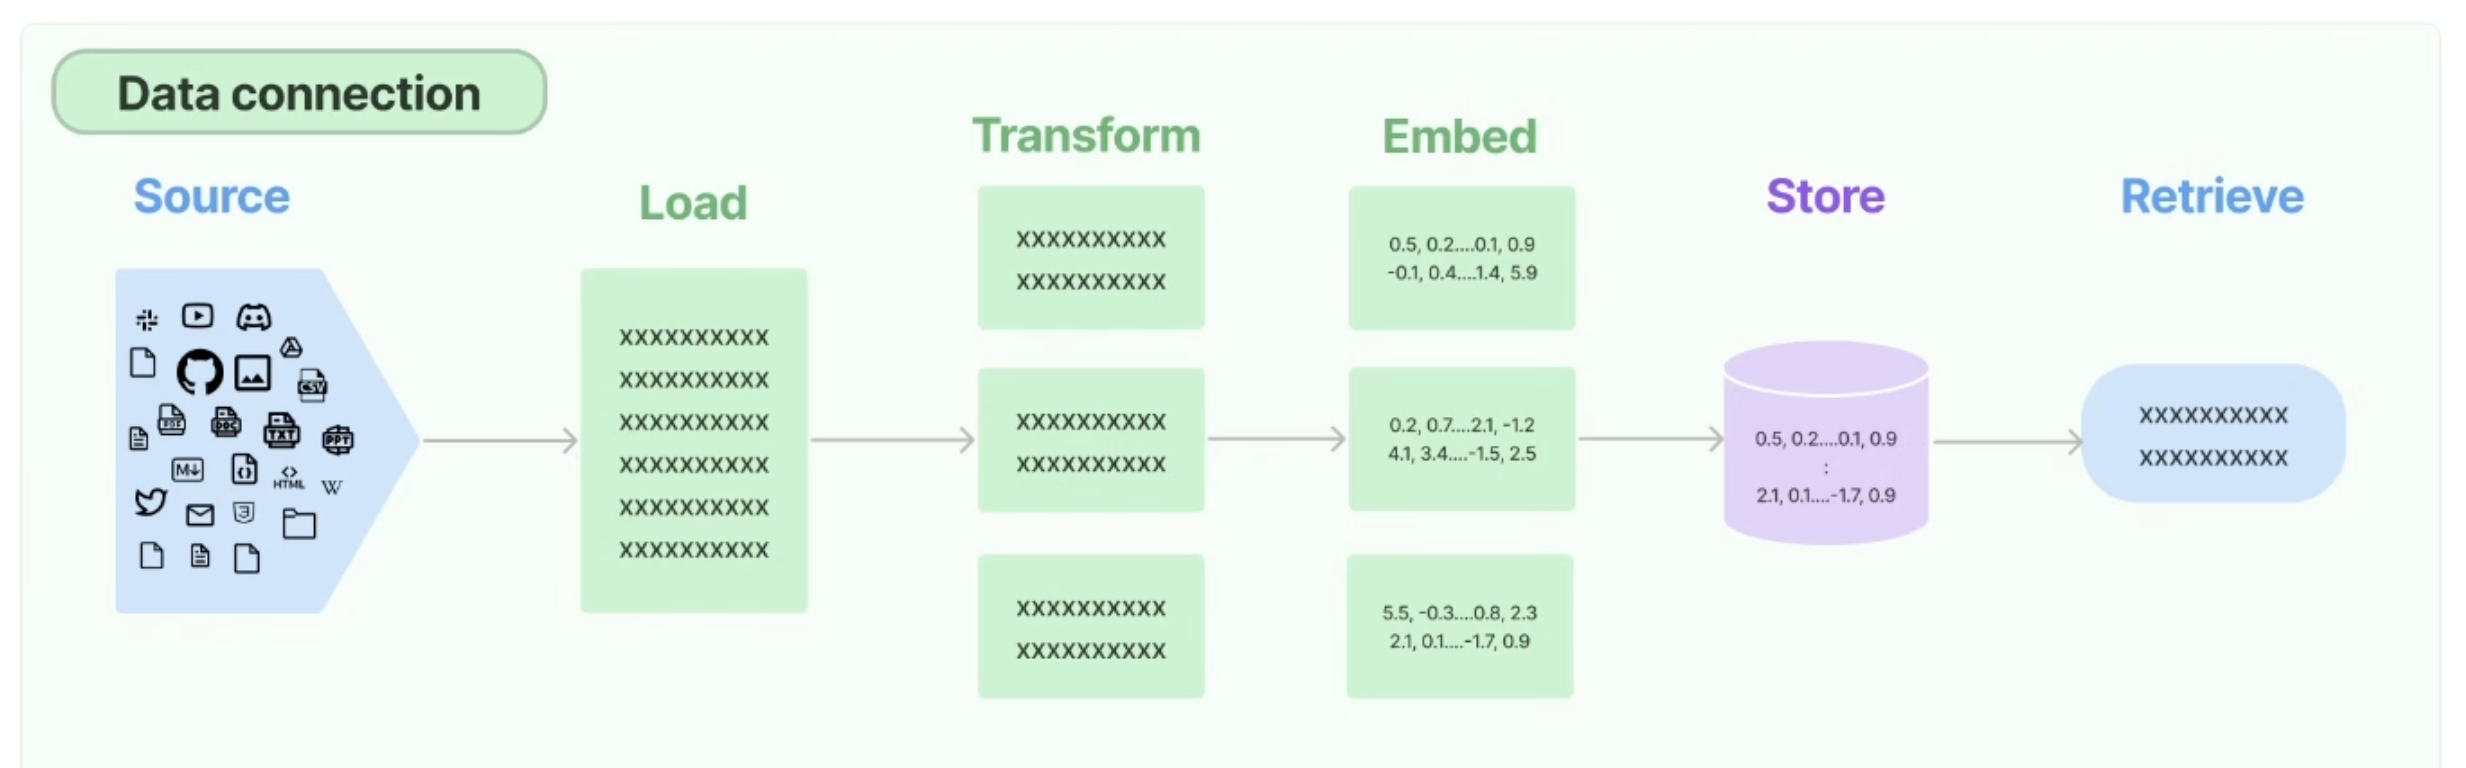

### (1) Chroma

- Chroma: 대표적인 오픈소스 벡터 저장소

In [59]:
!pip install chromadb tiktoken transformers sentence_transformers openai langchain pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.

- 기본적으로 VectorStore는 벡터를 일시적으로 저장
- 텍스트와 임베딩 함수를 지정하여 from_documents() 함수에 보내면, 지정된 임베딩 함수를 통해 텍스트를 벡터로 변환하고, 이를 임시 db로 생성
- similarity_search() 함수에 쿼리를 지정해주면 이를 바탕으로 가장 벡터 유사도가 높은 벡터를 찾고 이를 자연어 형태로 출력

In [60]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

tokenizer = tiktoken.get_encoding("cl100k_base")

def tiktoken_len(text):
    tokens = tokenizer.encode(text)
    return len(tokens)

In [61]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyPDFLoader


# 문서 로드 후 문서를 chunk 단위로 split
loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

# chunk 단위로 split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0, length_function = tiktoken_len)
docs = text_splitter.split_documents(pages)

# huggingface의 ko-sbert-nli 임베딩 모델 활용
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)


In [62]:
# 문서와 임베딩 모델을 Chroma에 로드
db = Chroma.from_documents(docs, hf)

# 질문
query = "6대 먹거리 산업은?"
docs = db.similarity_search(query)

# 결과 출력
print(docs[0].page_content)

-컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 
약 100% 수준으로 증가하고 있으며 , 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공
지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨
       * 에너지 , 방산, 우주항공 , 인공지능 (AI), 바이오 , 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정


In [63]:
tiktoken_len(docs[0].page_content)

229

- 그런데, 대부분의 경우에서는 내가 활용하고자 하는 문서를 나만의 디스크에 저장하고 필요할 때마다 호출 필요
- persist() 함수를 통해 벡터저장소를 로컬 저장하고, Chroma 객체를 선언할 때 로컬 저장소 경로를 지정하여 필요할 때 다시 로드 가능

In [64]:
# 디스크에 저장
db2 = Chroma.from_documents(docs, hf, persist_directory="./chroma_db")
docs = db2.similarity_search(query)

In [65]:
# 디스크에서 로드
db3 = Chroma(persist_directory="./chroma_db", embedding_function=hf)
docs = db3.similarity_search(query)
print(docs[0].page_content)

-컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 
약 100% 수준으로 증가하고 있으며 , 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공
지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨
       * 에너지 , 방산, 우주항공 , 인공지능 (AI), 바이오 , 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정




---


쿼리와 유사한 문서(청크)를 불러올 때, 유사도를 함께 제공하는 함수 similarity_search_with_score()를 제공합니다. 이를 통해서 내가 얻은 유사한 문장들의 유사도를 비교할 수 있으며, 특정 유사도 이상의 문서만 출력하도록 하는 등 다양한 활용이 가능합니다.

In [66]:
docs = db3.similarity_search_with_relevance_scores(query, k=3)


print("가장 유사한 문서:\n\n {}\n\n".format(docs[0][0].page_content))
print("문서 유사도:\n {}".format(docs[0][1]))

가장 유사한 문서:

 -컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 
약 100% 수준으로 증가하고 있으며 , 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공
지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨
       * 에너지 , 방산, 우주항공 , 인공지능 (AI), 바이오 , 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정


문서 유사도:
 0.2549497964950438


### (2) FAISS

- Facebook AI 유사성 검색(Faiss)은 고밀도 벡터의 효율적인 유사성 검색 및 클러스터링을 위한 라이브러리
- 모든 크기의 벡터 집합에서 검색하는 알고리즘이 포함되어 있으며, RAM에 맞지 않을 수 있는 벡터까지 검색 가능
- 평가 및 매개변수 조정을 위한 지원 코드도 포함

In [67]:
pip install faiss-cpu # cpu 버전 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 34.9 MB/s eta 0:00:00


In [68]:
from langchain.vectorstores import FAISS

In [69]:
loader = PyPDFLoader("/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

# chunk 단위로 split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0, length_function = tiktoken_len)
docs = text_splitter.split_documents(pages)

# huggingface의 ko-sbert-nli 임베딩 모델 활용
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [70]:
# 문서와 임베딩 모델을 FAISS에 로드
db = FAISS.from_documents(docs, ko)

In [71]:
# 질문
query = "인공지능 산업구조는 어떻게 구성되어있어?"
docs = db.similarity_search(query)

# 결과 출력
print(docs[0].page_content)

| 10 | CIS이슈리포트 2022-2 호 ▶인공지능 산업의 value chain 은 ‘AI 플랫폼 공급업체 → AI 어플리케이션 개발 → AI 응용솔루션  
개발 → 이용자 ’로 구성되며 , 동 산업은 ①성장기 산업, ②대체재로부터의 위협이 낮은 산업, ③기
술집약적 산업 등의 특징을 가짐
￮알고리즘 , 하드웨어 기술개발과 응용솔루션 서비스 상용화가 활발히 진행 중인 성장기 산업이며 , 
수요 기업의 요구사항에 따라 운영플랫폼을 선택할 수 있는 구매자의 교섭력이 높은 산업임
￮직접적인 대체 기술이 없어 대체재로부터 위협이 낮은 편이며 , 알고리즘의 동작원리를 이해하고 맞
춤형 서비스를 지원하기 위한 솔루션 개발 능력이 뒷받침 되어야 하는 기술집약적 산업임
▶시장조사전문기관 BCC research 에 따르면 세계 인공지능 시장규모는 2020년 398.4 억 달러에서


In [72]:
docs_and_scores = db.similarity_search_with_score(query)
docs_and_scores

[(Document(page_content='| 10 | CIS이슈리포트 2022-2 호 ▶인공지능 산업의 value chain 은 ‘AI 플랫폼 공급업체 → AI 어플리케이션 개발 → AI 응용솔루션  \n개발 → 이용자 ’로 구성되며 , 동 산업은 ①성장기 산업, ②대체재로부터의 위협이 낮은 산업, ③기\n술집약적 산업 등의 특징을 가짐\n￮알고리즘 , 하드웨어 기술개발과 응용솔루션 서비스 상용화가 활발히 진행 중인 성장기 산업이며 , \n수요 기업의 요구사항에 따라 운영플랫폼을 선택할 수 있는 구매자의 교섭력이 높은 산업임\n￮직접적인 대체 기술이 없어 대체재로부터 위협이 낮은 편이며 , 알고리즘의 동작원리를 이해하고 맞\n춤형 서비스를 지원하기 위한 솔루션 개발 능력이 뒷받침 되어야 하는 기술집약적 산업임\n▶시장조사전문기관 BCC research 에 따르면 세계 인공지능 시장규모는 2020년 398.4 억 달러에서', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf', 'page': 9}),
  0.693443),
 (Document(page_content='혁신성장 정책금융 동향 : ICT 산업을 중심으로\n  CIS이슈리포트 2022-2 호 | 9 |▶다양한 데이터나 복잡한 자료 속에서 핵심적인 특징을 요약하는 ①데이터 추상화 기술, 방대한 지식\n체계를 이용하는 ②빅데이터 기술, 빅데이터를 처리하기 위한 ③고성능 컴퓨팅 기술이 인공지능 \n구현의 핵심임\n￮데이터를 추상화하는 방법은 크게 인공신경망 (ANN), 심층신경망 (DNN), 합성곱신경망 (CNN) 및 \n순환신경망 (RNN) 등으로 구분됨\n[인공지능 데이터 추상화 기술]\n구분 특징 장점 단점\n인공신경망 (ANN)\nArtificial Neural \nNetwork사람의 신경망 원리와 구조를 모방하여 

In [73]:
# 디스크에 저장
db.save_local("faiss_index")

In [74]:
# 디스크에서 로드
new_db = FAISS.load_local("faiss_index", ko, allow_dangerous_deserialization=True)

# 질문
query = "인공지능 산업구조는 어떻게 구성되어있어?"
docs = new_db.similarity_search_with_relevance_scores(query, k=3)

# 결과 출력
print("질문: {} \n".format(query))
for i in range(len(docs)):
    print("{0}번째 유사 문서 유사도 \n{1}".format(i+1, round(docs[i][1], 2)))
    print("-" * 100)
    print(docs[i][0].page_content)
    print("\n")
    print(docs[i][0].metadata)
    print("-" * 100)


질문: 인공지능 산업구조는 어떻게 구성되어있어? 

1번째 유사 문서 유사도 
0.51
----------------------------------------------------------------------------------------------------
| 10 | CIS이슈리포트 2022-2 호 ▶인공지능 산업의 value chain 은 ‘AI 플랫폼 공급업체 → AI 어플리케이션 개발 → AI 응용솔루션  
개발 → 이용자 ’로 구성되며 , 동 산업은 ①성장기 산업, ②대체재로부터의 위협이 낮은 산업, ③기
술집약적 산업 등의 특징을 가짐
￮알고리즘 , 하드웨어 기술개발과 응용솔루션 서비스 상용화가 활발히 진행 중인 성장기 산업이며 , 
수요 기업의 요구사항에 따라 운영플랫폼을 선택할 수 있는 구매자의 교섭력이 높은 산업임
￮직접적인 대체 기술이 없어 대체재로부터 위협이 낮은 편이며 , 알고리즘의 동작원리를 이해하고 맞
춤형 서비스를 지원하기 위한 솔루션 개발 능력이 뒷받침 되어야 하는 기술집약적 산업임
▶시장조사전문기관 BCC research 에 따르면 세계 인공지능 시장규모는 2020년 398.4 억 달러에서


{'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf', 'page': 9}
----------------------------------------------------------------------------------------------------
2번째 유사 문서 유사도 
0.48
----------------------------------------------------------------------------------------------------
혁신성장 정책금융 동향 : ICT 산업을 중심으로
  CIS이슈리포트 2022-2 호 | 9 |▶다양한

In [75]:
# 다른 질문
query = "5G 이동통신 시스템은?"
docs = new_db.max_marginal_relevance_search(query,k=3,fetch_k = 10, lambda_mult = 0.3)

# 결과 출력
print("질문: {} \n".format(query))
for i in range(len(docs)):
    print("{}번째 유사 문서:".format(i+1))
    print("-"*100)
    print(docs[i].page_content)
    print("\n")
    print(docs[i].metadata)
    print("-"*100)
    print("\n\n")


질문: 5G 이동통신 시스템은? 

1번째 유사 문서:
----------------------------------------------------------------------------------------------------
확장, ②스몰셀 (Small cell)을 도입한 기지국 , ③다중안테나 송수신 (Massive MIMO), ④네트워크 
슬라이싱 (Network Slicing) 등의 기술을 도입함
[5G 주요 요소기술 특징]
자료: 삼정 KPMG


{'source': '/content/drive/MyDrive/Colab Notebooks/LLM 실습/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf', 'page': 5}
----------------------------------------------------------------------------------------------------



2번째 유사 문서:
----------------------------------------------------------------------------------------------------
▶주요 기술분야별 세부 품목단위로는 5G 이동통신시스템 , 인공지능 (AI), 시스템반도체 및 스마트센서 에 
정책금융 공급량이 높은 것으로 확인됨
￮정부가 미래 먹거리산업으로 선정한 인공지능 (AI)의 미래성장율 (CAGR: 41.0%) 이 가장 높으며 , 시장규모는  
시스템반도체 (3,833.8 억 달러, 2025 년)가 가장 큰 것으로 분석됨
￮4대 품목은 공통적으로 수요기반이 크고, 각국 정부가 중점적으로 육성을 지원하고 있어 시장이 지속 
성장할 것으로 전망되나 , 원천기술 미확보 및 높은 해외 의존도가 약점으로 지적되어 국내 기업의 경쟁력  
강화가 시급한 것으로 평가됨
[혁신성장 ICT 주요 품목 시장전망 ]
                                  